<a href="https://colab.research.google.com/github/johanaluna/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Johana_LS_DS7_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
url='https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
df = pd.read_csv(url, 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

In [346]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [347]:
print(df.shape) #check size of my data

(435, 17)


In [348]:
df = df.replace({'?':np.NaN, 'n':0, 'y':1})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [349]:
republican = df[df.party == "republican"]#split data by party
print(republican.shape)
republican.head()


(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [350]:
democrat = df[df.party == "democrat"]
print(democrat.shape)
democrat.head()

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
 namescolumns=['handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

### Just for Fun
I calculated all my stand dev and saved them in 1 table

In [352]:
# Calculate the sample std deviation
democrat_stand = np.std(democrat, ddof=1)
democrat_stand=pd.DataFrame({'dem_stand_dev':democrat_stand})
democrat_stand=democrat_stand.reset_index()
democrat_stand=democrat_stand.rename(columns={'index':'party', 'dem_stand_dev':'dem_stand_dev'})
democrat_stand.head()

,party,dem_stand_dev
0,handicapped-infants,0.489876
1,water-project,0.501045
2,budget,0.315405
3,physician-fee-freeze,0.226562
4,el-salvador-aid,0.412106


In [353]:
# Calculate the sample std deviation
republican_stand = np.std(republican, ddof=1)
republican_stand=pd.DataFrame({'rep_stand_dev':republican_stand})
republican_stand=republican_stand.reset_index()
republican_stand=republican_stand.rename(columns={'index':'party', 'rep_stand_dev':'rep_stand_dev'})
republican_stand.head()

,party,rep_stand_dev
0,handicapped-infants,0.391804
1,water-project,0.501652
2,budget,0.341853
3,physician-fee-freeze,0.109760
4,el-salvador-aid,0.215442


# Standard Deviation Total
Create a unique table with all the standard deviation by parties.

In [354]:
party_stand_dev= pd.merge(democrat_stand,republican_stand, on='party')
party_stand_dev.head()

,party,dem_stand_dev,rep_stand_dev
0,handicapped-infants,0.489876,0.391804
1,water-project,0.501045,0.501652
2,budget,0.315405,0.341853
3,physician-fee-freeze,0.226562,0.109760
4,el-salvador-aid,0.412106,0.215442


### Make calculations with the column  'education as an example

In [355]:
##education dataframe Democrat
dem_edu_stand = np.std(democrat['education'], ddof=1)
print("Education standard deviation", dem_edu_stand)

Education standard deviation 0.35238347835577044


In [356]:
sample_size = len(democrat['education'])
print(sample_size)

267


In [357]:
edu_stand_error = dem_edu_stand / (sample_size**.5)
print("Standard Error of education in Ddemocrats", edu_stand_error)

Standard Error of education in Ddemocrats 0.02156551865419398


In [358]:
stderr = stats.sem(democrat['education'], ddof=1, nan_policy='omit')
print("Scipy standard error for Education in Democrats", stderr)

Scipy standard error for Education in Democrats 0.022331395571821868


## Function Confidence Intervals for my Dataframes Democrats and Republicans

In [0]:
def confidence_interval(data, confidence_level=0.95):
  data= data.dropna()
  mean_sample = np.mean(data)
  size_sample = len(data)
  std_dev_sample = np.std(data, ddof=1)
  error_stand = std_dev_sample / (size_sample**.5)
  margin_of_error = error_stand * stats.t.ppf((1 + confidence_level) / 2.0, size_sample - 1)
  return (mean_sample, mean_sample - margin_of_error, mean_sample + margin_of_error)

In [360]:
a=democrat['education']
CI=confidence_interval(a)
print('mean:',CI[0], '\nlower bound:',CI[1], '\nupperbound',CI[2])

mean: 0.14457831325301204 
lower bound: 0.1005949402232755 
upperbound 0.18856168628274858


# FUNCTION ALL DATAFRAME

In [361]:
result=[]

def confidence_interval(name_col, confidence_level=0.95):
  for x in name_col:
    data= df[x].dropna()
    mean_sample = np.mean(data)
    size_sample = len(data)
    std_dev_sample = np.std(data, ddof=1)
    error_stand = std_dev_sample / (size_sample**.5)
    margin_of_error = error_stand * stats.t.ppf((1 + confidence_level) / 2.0, size_sample - 1)
    lower_bound= mean_sample - margin_of_error
    upper_bound=mean_sample + margin_of_error
    result.append([x,mean_sample, lower_bound,  upper_bound])
  return result

confidence_interval(namescolumns)

[['handicapped-infants',
  0.44208037825059104,
  0.3945604630836468,
  0.4896002934175353],
 ['water-project', 0.5038759689922481, 0.4538408131166359, 0.5539111248678602],
 ['budget', 0.5966981132075472, 0.549815180853617, 0.6435810455614773],
 ['physician-fee-freeze',
  0.41745283018867924,
  0.37032346810896233,
  0.46458219226839614],
 ['el-salvador-aid',
  0.5047619047619047,
  0.4567501383795158,
  0.5527736711442937],
 ['religious-groups',
  0.6415094339622641,
  0.5956780789343131,
  0.6873407889902151],
 ['anti-satellite-ban',
  0.5676959619952494,
  0.5201811192521687,
  0.6152108047383301],
 ['aid-to-contras', 0.5761904761904761, 0.528737247116842, 0.6236437052641103],
 ['mx-missile', 0.5012106537530266, 0.45278830107341994, 0.5496330064326334],
 ['immigration', 0.5046728971962616, 0.4571155174657166, 0.5522302769268066],
 ['synfuels', 0.36231884057971014, 0.31582505683185425, 0.40881262432756604],
 ['education', 0.42326732673267325, 0.3748839176014873, 0.4716507358638592],


In [363]:
df_result = pd.DataFrame(result, columns=['project','mean','lower_bond','upper_bond']) #create data frame with my list
df_result

,project,mean,lower_bond,upper_bond
0,handicapped-infants,0.442080,0.394560,0.489600
1,water-project,0.503876,0.453841,0.553911
2,budget,0.596698,0.549815,0.643581
3,physician-fee-freeze,0.417453,0.370323,0.464582
4,el-salvador-aid,0.504762,0.456750,0.552774
5,religious-groups,0.641509,0.595678,0.687341
6,anti-satellite-ban,0.567696,0.520181,0.615211
7,aid-to-contras,0.576190,0.528737,0.623644
8,mx-missile,0.501211,0.452788,0.549633
9,immigration,0.504673,0.457116,0.552230


In [364]:
df_result.set_index('project',inplace=True) #make project as an idex
df_result

,mean,lower_bond,upper_bond
project,,,
handicapped-infants,0.442080,0.394560,0.489600
water-project,0.503876,0.453841,0.553911
budget,0.596698,0.549815,0.643581
physician-fee-freeze,0.417453,0.370323,0.464582
el-salvador-aid,0.504762,0.456750,0.552774
religious-groups,0.641509,0.595678,0.687341
anti-satellite-ban,0.567696,0.520181,0.615211
aid-to-contras,0.576190,0.528737,0.623644
mx-missile,0.501211,0.452788,0.549633


In [365]:
df_result=df_result.T #traspose to see better my data
df_result

project,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
mean,0.44208,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.576190,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
lower_bond,0.39456,0.453841,0.549815,0.370323,0.456750,0.595678,0.520181,0.528737,0.452788,0.457116,0.315825,0.374884,0.461165,0.546017,0.379253,0.770438
upper_bond,0.48960,0.553911,0.643581,0.464582,0.552774,0.687341,0.615211,0.623644,0.549633,0.552230,0.408813,0.471651,0.558348,0.640586,0.475784,0.854939


In [0]:
# Rows:
data.iloc[0] # first row of data frame 
data.iloc[1] # second row of data frame 
data.iloc[-1] # last row of data frame 

In [367]:
df_result['handicapped-infants'].iloc[-1] #cheking that print correctly

0.4896002934175353

# VISUALIZATION handicapped-infants

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


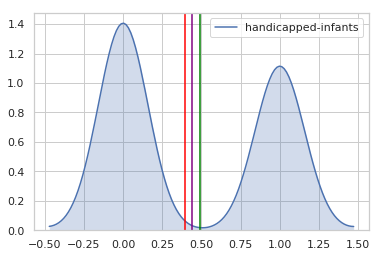

In [368]:
import seaborn as sns

sns.kdeplot(df['handicapped-infants'], shade='blue');
plt.axvline(x=df_result['handicapped-infants'].iloc[-1], color='green')
plt.axvline(x=df_result['handicapped-infants'].iloc[1], color='red')
plt.axvline(x=df_result['handicapped-infants'].iloc[0], color='purple');

#VISUALIZATION FOR ALL MY DATA

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


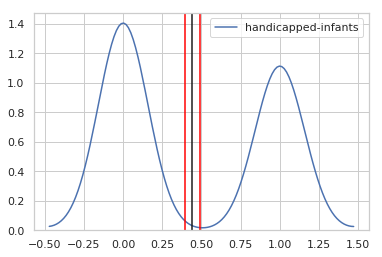

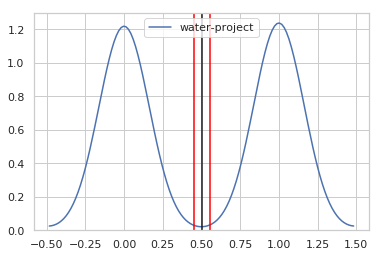

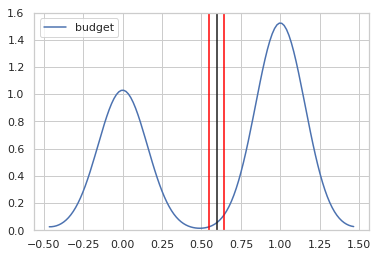

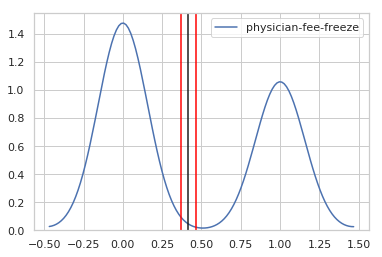

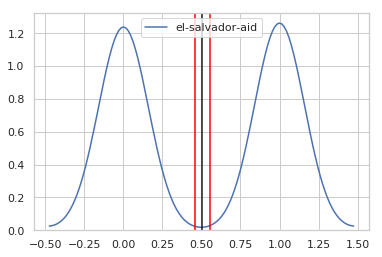

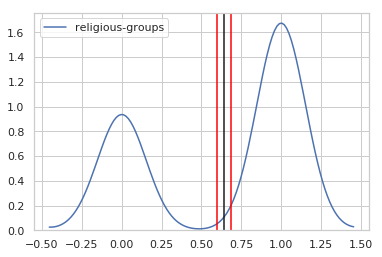

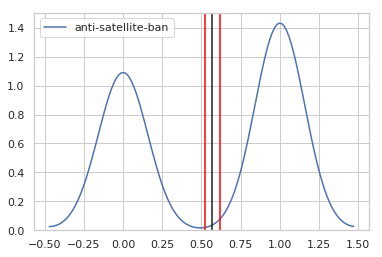

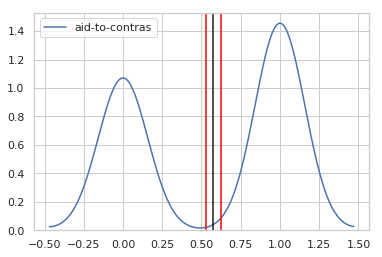

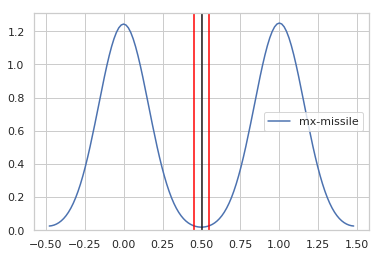

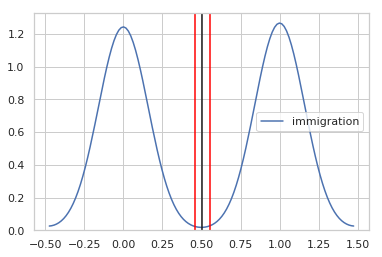

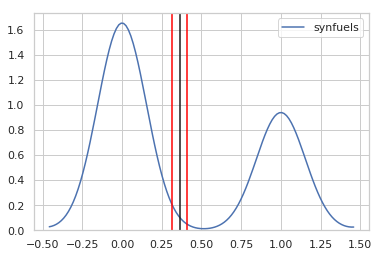

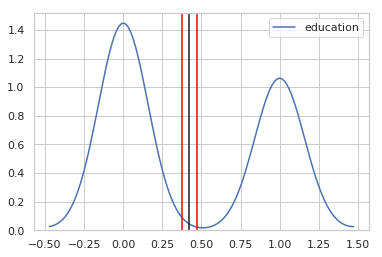

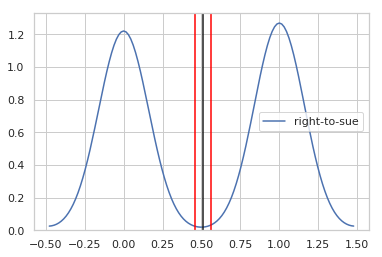

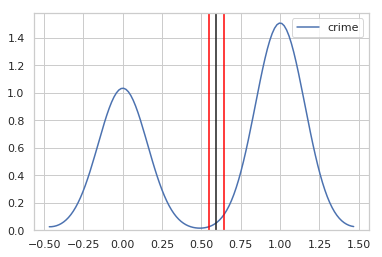

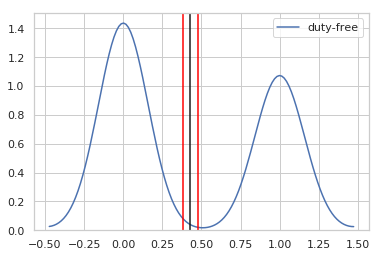

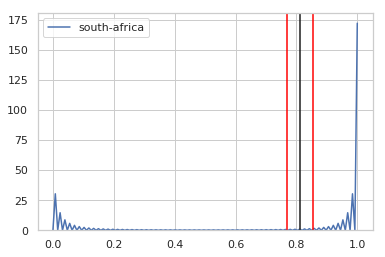

In [369]:
for i in namescolumns:
  plt.figure()
  sns.kdeplot(df[i]);
  plt.axvline(x=df_result[i].iloc[-1], color='red')
  plt.axvline(x=df_result[i].iloc[1], color='red')
  plt.axvline(x=df_result[i].iloc[0], color='k');

Interpret the confidence interval - what does it tell you about the data and its distribution?

There is a 95% chance that the confidence interval calculated contains the true population mean.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
cc = []
def hay():
  for i in range(5):  
    x=i
    y=i+1
    cc.append([x,y])
  return(cc)
hay()

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]

In [0]:
obj_a = pd.DataFrame(cc) 
obj_a.head()

,0,1
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)